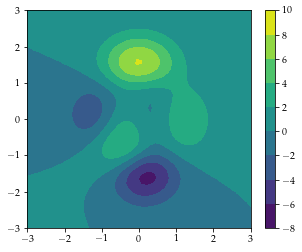

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import numpy as np
from utils import peaks, plot_peaks, feas

plot_peaks()

In [2]:
from sumomo import DataHandler


n = 100    # number of samples
space = [[-3.0, 3.0],[-3.0, 3.0]]  # input space

dh = DataHandler()  # initialise DataHandler
dh.init(n, space)   # initialise input samples, x
dh.y = peaks(dh.x)  # save output samples, y
dh.t = feas(dh.x)   # save class targets, t

dh.split(test_size=0.3)  # train-test split
dh.scale()    # standardise data

In [3]:
from sumomo import GPR, GPC

regressor = GPR()   # build GP for regression
classifier = GPC()  # build GP for classification

# fit regression GP to feasible scaled training data
regressor.fit(
    dh.x_train_[dh.t_train.ravel()==1, :], 
    dh.y_train_[dh.t_train.ravel()==1]
)

# fit classification NN to scaled training data
classifier.fit(
    dh.x_train_, 
    dh.t_train
)

/Users/alexdurkin/miniconda3/envs/sumomo-env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:335: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


In [4]:
from sumomo import Validator


def validation_metrics(classifier, regressor, dh, tester=None):
    if tester is None:
        v = Validator(model=classifier)
        v.calculate(dh.x_test_, dh.t_test)

        print('{:10} {:12}'.format('metric', 'value'))
        print('{:10} {:<12.3f}'.format('accuracy', v.accuracy))
        print('{:10} {:<12.3f}'.format('precision', v.precision))
        print('{:10} {:<12.3f}'.format('recall', v.recall))
        print('{:10} {:<12.3f}'.format('F1', v.f1))
        print('{:10} {:<12.3f}'.format('log loss', v.log_loss))

        class_test = classifier.predict(dh.x_test_, return_class=True)[1]

        v1 = Validator(model=regressor, scaler=dh)
        v1.calculate(dh.x_test_, dh.y_test)
        v2 = Validator(model=regressor, scaler=dh)
        v2.calculate(dh.x_test_[class_test.ravel() == 1, :], dh.y_test[class_test == 1])
        v3 = Validator(model=regressor, scaler=dh)
        v3.calculate(dh.x_test_[dh.t_test.ravel()==1, :], dh.y_test[dh.t_test==1])

        print('{:10} {:12} {:12} {:12}'.format('metric', 'all testing', 'predicted 1', 'actual 1'))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MAE', v1.mae, v2.mae, v3.mae))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MSE', v1.mse, v2.mse, v3.mse))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MAPE', v1.mape, v2.mape, v3.mape))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MEDAE', v1.median_ae, v2.median_ae, v3.median_ae))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('EVS', v1.evs, v2.evs, v3.evs))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('R2', v1.r2, v2.r2, v3.r2))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MAXE', v1.maxe, v2.maxe, v3.maxe))
    
    else:
        v = Validator(model=classifier)
        v.calculate(tester.x_, tester.t)

        print('{:10} {:12}'.format('metric', 'value'))
        print('{:10} {:<12.3f}'.format('accuracy', v.accuracy))
        print('{:10} {:<12.3f}'.format('precision', v.precision))
        print('{:10} {:<12.3f}'.format('recall', v.recall))
        print('{:10} {:<12.3f}'.format('F1', v.f1))
        print('{:10} {:<12.3f}'.format('log loss', v.log_loss))

        class_test = classifier.predict(tester.x_, return_class=True)[1]

        v1 = Validator(model=regressor, scaler=dh)
        v1.calculate(tester.x_, tester.y)
        v2 = Validator(model=regressor, scaler=dh)
        v2.calculate(tester.x_[class_test.ravel() == 1, :], tester.y[class_test == 1])
        v3 = Validator(model=regressor, scaler=dh)
        v3.calculate(tester.x_[tester.t.ravel()==1, :], tester.y[tester.t==1])

        print('{:10} {:12} {:12} {:12}'.format('metric', 'all testing', 'predicted 1', 'actual 1'))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MAE', v1.mae, v2.mae, v3.mae))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MSE', v1.mse, v2.mse, v3.mse))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MAPE', v1.mape, v2.mape, v3.mape))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MEDAE', v1.median_ae, v2.median_ae, v3.median_ae))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('EVS', v1.evs, v2.evs, v3.evs))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('R2', v1.r2, v2.r2, v3.r2))
        print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MAXE', v1.maxe, v2.maxe, v3.maxe))

validation_metrics(classifier, regressor, dh)

metric     value       
accuracy   1.000       
precision  1.000       
recall     1.000       
F1         1.000       
log loss   0.158       
metric     all testing  predicted 1  actual 1    
MAE        0.554        0.511        0.511       
MSE        0.459        0.584        0.584       
MAPE       12.538       0.445        0.445       
MAPE       0.520        0.231        0.231       
EVS        0.871        0.918        0.918       
R2         0.865        0.917        0.917       
MAXE       2.105        2.105        2.105       


In [5]:
import pyomo.environ as pyo
from sumomo import BlockFormulation


# larger optimisation formulation
omo = pyo.ConcreteModel()
omo.n_inputs = set(range(len(space)))
omo.inputs = pyo.Var(omo.n_inputs, bounds=dh.space_)
omo.output = pyo.Var()
omo.proba = pyo.Var()
omo.feasibility_con = pyo.Constraint(expr= omo.proba >= 0.5 )
omo.obj = pyo.Objective(expr=omo.output, sense=pyo.maximize)

# formulate pyomo blocks for gpr and gpc
omo.mdl = pyo.Block(rule=BlockFormulation(regressor).rule())
omo.feas = pyo.Block(rule=BlockFormulation(classifier).rule())

# connect pyomo model input and output to the surrogate models
omo.c = pyo.ConstraintList()
for i in omo.n_inputs:
    omo.c.add( omo.inputs[i] == omo.mdl.inputs[i] )
    omo.c.add( omo.inputs[i] == omo.feas.inputs[i] )
omo.c.add( omo.output == omo.mdl.outputs[0] )
omo.c.add( omo.proba == omo.feas.outputs[0] )

In [6]:
# solver setup
solver = pyo.SolverFactory('baron')
solver.options['MaxTime'] = 30
# macOS requires CplexLibName option to be specified, please change accordingly
solver.options['CplexLibName'] = "/Applications/CPLEX_Studio201/cplex/bin/x86-64_osx/libcplex2010.dylib"
# solve
results = solver.solve(omo, tee=True)

# inverse scale solution
x = np.fromiter(omo.inputs.extract_values().values(), dtype=float).reshape(1, -1)
solution = dh.inv_scale_x(x).ravel()

# inverse scale objective and corresponding predictions
obj = dh.inv_scale_y(np.array(omo.output.value).reshape(1, -1))
pred = dh.inv_scale_y(regressor.predict(x.reshape(1, -1)))

# compare optimisation outputs with model prediction
print()
print('{:18} {:12}'.format('variable', 'value'))
print('{:18} {:<12.8f}'.format('x1*', solution[0]))
print('{:18} {:<12.8f}'.format('x2*', solution[1]))
print('{:18} {:<12.8f}'.format('omo obj at x*', obj[0][0]))
print('{:18} {:<12.8f}'.format('pred at x*', pred[0][0]))
print('{:18} {:<12.8f}'.format('omo proba', omo.proba.value))
print('{:18} {:<12.8f}'.format('proba pred at x*', classifier.predict(x.reshape(1, -1)).item()))

 BARON version 22.4.20. Built: OSX-64 Wed Apr 20 10:52:09 EDT 2022

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 Licensee: Benoit Chachuat at Imperial College London, b.chachuat@imperial.ac.uk.

 If you use this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Khajavirad, A. and N. V. Sahinidis,
 A hybrid LP/NLP paradigm for global optimization relaxations,
 Mathematical Programming Computation, 10, 383-421, 2018.
 This BARON run may utilize the following subsolver(s)
 For LP/MIP/QP: CLP/CBC, ILOG CPLEX                             
 For NLP: IPOPT, FILTERSQP
 Doing local search
 Solving bounding LP
 Starting multi-start local search
 Preprocessing found feasible solution with value 0.992023422634     
 Done with local search
  Iteration    Open nodes         Time (s)    Lower bound      Upper bound
          1             1             2.21     0.992023         68.3778    
*        

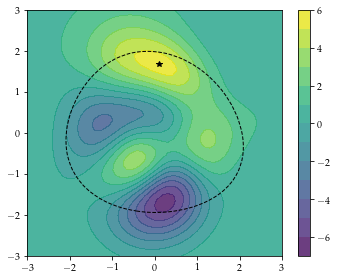

In [7]:
import matplotlib.pyplot as plt


x1, x2 = np.linspace(-3, 3, 50), np.linspace(-3, 3, 50)
x1grid, x2grid = np.meshgrid(x1, x2)
x_new = np.c_[x1grid.ravel(), x2grid.ravel()]
x_scaled = dh.scale_x(x_new)

pred = regressor.predict(x_scaled)
pred = dh.inv_scale_y(pred)
pred = pred.reshape(x1grid.shape)

prob = classifier.predict(x_scaled)
prob = prob.reshape(x1grid.shape)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
c = ax.contourf(x1, x2, pred, levels=12, alpha=0.8)
ax.contour(x1, x2, prob, levels=[0.5], linestyles='dashed', colors='k', linewidths=1)
ax.plot(solution[0], solution[1], 'k*')
fig.colorbar(c)

plt.tight_layout()

# AdaptiveSampler

* Use different `solver` configurations for heuristic solve in adaptive sampling, e.g. baron with only multi local search or other heuristic solvers.
* Constrained and unconstrained by classifier, include discussion of training regressor only on feasible samples.
* How to integrate new samples into DataHandler and continue sampling?
* Relax feasibility constraints to enable updating of classification model at boundary?
* Use `_gpr_std_rule` formulation within multi-objective optimisation.
* Termination/convergence criteria?
* Delaunay triangle adaptive sampling with feasibility constraints?

In [8]:
from sumomo import AdaptiveSampler


# maximise GP variance constrained
ads_cons = AdaptiveSampler(dh.space_, regressor, classifier)
new_cons = ads_cons.max_gp_std(solver=solver)
new_cons = dh.inv_scale_x(new_cons).ravel()

# constrained Delaunay triangulation
ads_cons_dt = AdaptiveSampler(dh.space_, classifier=classifier)
new_dt = ads_cons.max_dt(dh.x_train_, solver=solver)
new_dt = dh.inv_scale_x(new_dt).ravel()

# unconstrained expected improvement
ei = AdaptiveSampler(dh.space_, regressor)
new_ei = ei.expected_improvement(dh.y_train_)
new_ei = dh.inv_scale_x(new_ei).ravel()

# unconstrained modified expected improvement
mei = AdaptiveSampler(dh.space_, regressor)
new_mei = ei.expected_improvement(dh.y_train_, aquisition='modified')
new_mei = dh.inv_scale_x(new_mei).ravel()

# exploit constrained Delaunay triangulation
exp_dt = AdaptiveSampler(dh.space_, classifier=classifier)
new_exp_dt = exp_dt.exploit_dt(dh.x_train_, dh.y_train_, solver=solver)
new_exp_dt = dh.inv_scale_x(new_exp_dt).ravel()

# constrained modified expected improvement
con_mei = AdaptiveSampler(dh.space_, regressor, classifier)
new_con_mei = con_mei.expected_improvement(dh.y_train_, solver=solver)
new_con_mei = dh.inv_scale_x(new_con_mei).ravel()

print('maximised GP variance: {}'.format(new_cons))
print('Delaunay triangulation: {}'.format(new_dt))
print('expected improvement: {}'.format(new_ei))
print('modified expected improvement: {}'.format(new_mei))
print('exploit Delaunay triangulation: {}'.format(new_exp_dt))
print('constrained modified expected improvement: {}'.format(new_con_mei))

 BARON version 22.4.20. Built: OSX-64 Wed Apr 20 10:52:09 EDT 2022

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 Licensee: Benoit Chachuat at Imperial College London, b.chachuat@imperial.ac.uk.

 If you use this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Khajavirad, A. and N. V. Sahinidis,
 A hybrid LP/NLP paradigm for global optimization relaxations,
 Mathematical Programming Computation, 10, 383-421, 2018.
 This BARON run may utilize the following subsolver(s)
 For LP/MIP/QP: CLP/CBC, ILOG CPLEX                             
 For NLP: IPOPT, FILTERSQP
 Doing local search
 Solving bounding LP
 Starting multi-start local search
 Done with local search
  Iteration    Open nodes         Time (s)    Lower bound      Upper bound
*         1             1             1.70    -1.32866          2613.35    
          1             1             2.16    -1.32866          2613.35    
*  

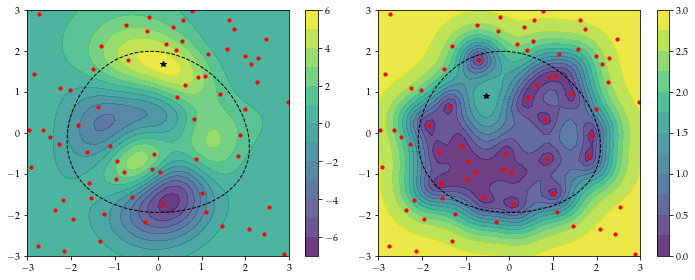

In [9]:
u = regressor.predict(x_scaled, return_std=True)[1]
u = u * dh.y_train_std
u = u.reshape(x1grid.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
c1 = ax1.contourf(x1, x2, pred, levels=12, alpha=0.8)
ax1.contour(x1, x2, prob, levels=[0.5], linestyles='dashed', colors='k', linewidths=1)
ax1.scatter(dh.x_train[:, 0], dh.x_train[:, 1], c='r', s=10)
ax1.plot(solution[0], solution[1], 'k*')
fig.colorbar(c1, ax=ax1)

c2 = ax2.contourf(x1, x2, u, levels=12, alpha=0.8)
ax2.contour(x1, x2, prob, levels=[0.5], linestyles='dashed', colors='k', linewidths=1)
ax2.scatter(dh.x_train[:, 0], dh.x_train[:, 1], c='r', s=10)
ax2.plot(new_cons[0], new_cons[1], 'k*')
fig.colorbar(c2, ax=ax2)

plt.tight_layout()

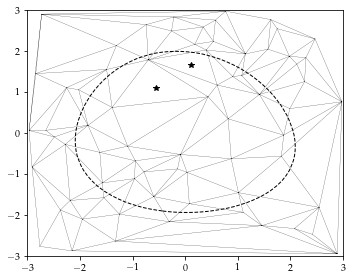

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.triplot(dh.x_train[:, 0], dh.x_train[:, 1], exp_dt.delaunay.simplices, c='k', lw=0.2)
ax.contour(x1, x2, prob, levels=[0.5], linestyles='dashed', colors='k', linewidths=1)
ax.plot(new_dt[0], new_dt[1], 'k*')
ax.plot(new_exp_dt[0], new_exp_dt[1], 'k*')

plt.tight_layout()

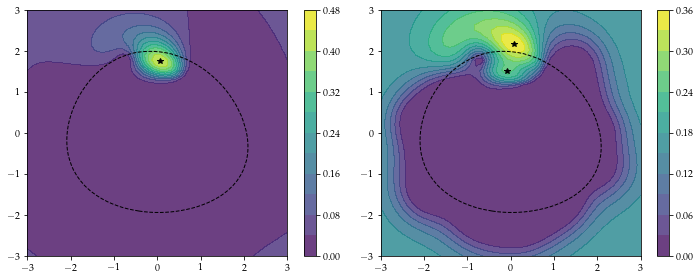

In [11]:
ei_pred = ei._ei(x_scaled, dh.y_train_, sense='max', xi=0.0)
ei_pred = ei_pred.reshape(x1grid.shape)

mei_pred = mei._modified_ei(x_scaled, dh.y_train_, sense='max')
mei_pred = mei_pred.reshape(x1grid.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
c1 = ax1.contourf(x1, x2, ei_pred, levels=12, alpha=0.8)
ax1.contour(x1, x2, prob, levels=[0.5], linestyles='dashed', colors='k', linewidths=1)
ax1.plot(new_ei[0], new_ei[1], 'k*')
fig.colorbar(c1, ax=ax1)

c2 = ax2.contourf(x1, x2, mei_pred, levels=12, alpha=0.8)
ax2.contour(x1, x2, prob, levels=[0.5], linestyles='dashed', colors='k', linewidths=1)
ax2.plot(new_mei[0], new_mei[1], 'k*')
ax2.plot(new_con_mei[0], new_con_mei[1], 'k*')
fig.colorbar(c2, ax=ax2)

plt.tight_layout()

# Iterating

Starting with a small number of samples, add more samples (one-by-one or in batches) and plot model validation metrics versus number of samples, repeat this multiple times and plot min-mean-max error bars.

In [12]:
n = 50    # number of samples
space = [[-3.0, 3.0],[-3.0, 3.0]]  # input space

dh = DataHandler()  # initialise DataHandler
dh.init(n, space)   # initialise input samples, x
dh.y = peaks(dh.x)  # save output samples, y
dh.t = feas(dh.x)   # save class targets, t
dh.scale()    # standardise data

tester = DataHandler()  # initialise DataHandler
tester.init(50, space, method='random')   # initialise input samples, x
tester.y = peaks(tester.x)  # save output samples, y
tester.t = feas(tester.x)   # save class targets, t
tester.x_ = dh.scale_x(tester.x)  # standardise x data
tester.y_ = dh.scale_y(tester.y)  # standardise y data

regressor = GPR()   # build GP for regression
classifier = GPC()  # build GP for classification

# fit regression GP to feasible scaled training data
regressor.fit(
    dh.x_[dh.t.ravel()==1, :], 
    dh.y_[dh.t.ravel()==1]
)

# fit classification NN to scaled training data
classifier.fit(
    dh.x_, 
    dh.t
)

validation_metrics(classifier, regressor, dh, tester)

metric     value       
accuracy   0.920       
precision  0.889       
recall     0.889       
F1         0.889       
log loss   0.239       
metric     all testing  predicted 1  actual 1    
MAE        1.429        0.909        1.204       
MSE        3.731        4.117        5.323       
MAPE       120.139      0.856        0.687       
MAPE       1.430        0.298        0.328       
EVS        0.689        0.716        0.727       
R2         0.375        0.665        0.650       
MAXE       6.491        6.491        6.491       


/Users/alexdurkin/miniconda3/envs/sumomo-env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:335: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


In [13]:
ads = AdaptiveSampler(dh.space_, regressor, classifier)
new_x = ads.max_gp_std(solver=solver, tee=False)
new_x = dh.inv_scale_x(new_x)
new_y = peaks(new_x)
new_t = feas(new_x)

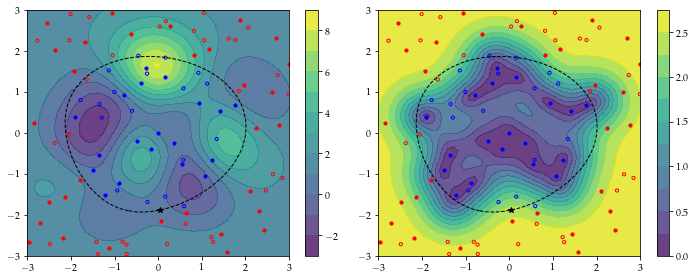

In [14]:
from utils import plot_adaptive_gp


plot_adaptive_gp(dh, tester, regressor, classifier, new_x)

/Users/alexdurkin/miniconda3/envs/sumomo-env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:335: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


metric     value       
accuracy   0.920       
precision  0.889       
recall     0.889       
F1         0.889       
log loss   0.230       
metric     all testing  predicted 1  actual 1    
MAE        0.919        0.361        0.418       
MSE        1.468        0.309        0.402       
MAPE       69.074       0.634        0.581       
MAPE       0.682        0.212        0.232       
EVS        0.792        0.976        0.976       
R2         0.754        0.975        0.974       
MAXE       3.143        1.863        1.863       


/Users/alexdurkin/miniconda3/envs/sumomo-env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:335: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


metric     value       
accuracy   0.920       
precision  0.938       
recall     0.833       
F1         0.882       
log loss   0.215       
metric     all testing  predicted 1  actual 1    
MAE        0.943        0.346        0.422       
MSE        1.548        0.403        0.477       
MAPE       69.018       0.403        0.375       
MAPE       0.777        0.151        0.187       
EVS        0.780        0.971        0.973       
R2         0.741        0.968        0.969       
MAXE       3.043        2.136        2.136       


/Users/alexdurkin/miniconda3/envs/sumomo-env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:335: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


metric     value       
accuracy   0.920       
precision  0.938       
recall     0.833       
F1         0.882       
log loss   0.222       
metric     all testing  predicted 1  actual 1    
MAE        0.979        0.363        0.432       
MSE        1.654        0.460        0.532       
MAPE       67.919       0.616        0.559       
MAPE       0.872        0.153        0.153       
EVS        0.767        0.969        0.974       
R2         0.723        0.964        0.965       
MAXE       2.972        2.297        2.297       


/Users/alexdurkin/miniconda3/envs/sumomo-env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:335: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


metric     value       
accuracy   0.960       
precision  0.944       
recall     0.944       
F1         0.944       
log loss   0.200       
metric     all testing  predicted 1  actual 1    
MAE        1.025        0.443        0.493       
MSE        1.739        0.599        0.662       
MAPE       65.614       0.395        0.397       
MAPE       0.944        0.172        0.177       
EVS        0.753        0.967        0.969       
R2         0.709        0.957        0.957       
MAXE       2.844        2.574        2.574       


/Users/alexdurkin/miniconda3/envs/sumomo-env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:335: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


metric     value       
accuracy   0.960       
precision  0.944       
recall     0.944       
F1         0.944       
log loss   0.198       
metric     all testing  predicted 1  actual 1    
MAE        0.847        0.389        0.440       
MSE        1.305        0.473        0.550       
MAPE       65.748       0.577        0.575       
MAPE       0.612        0.235        0.235       
EVS        0.815        0.973        0.974       
R2         0.782        0.966        0.964       
MAXE       2.800        2.292        2.292       


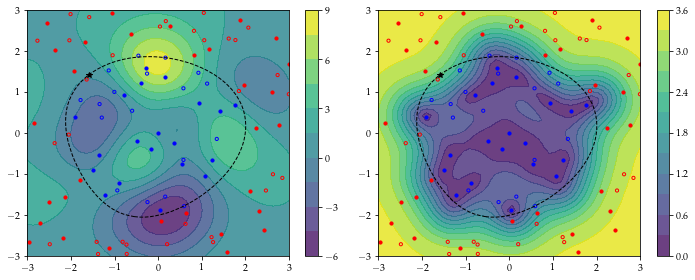

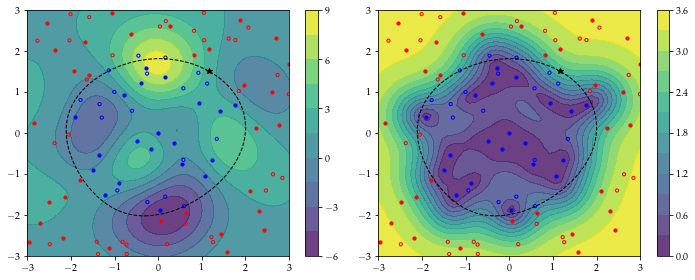

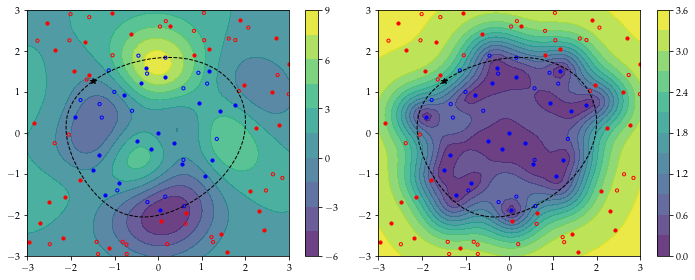

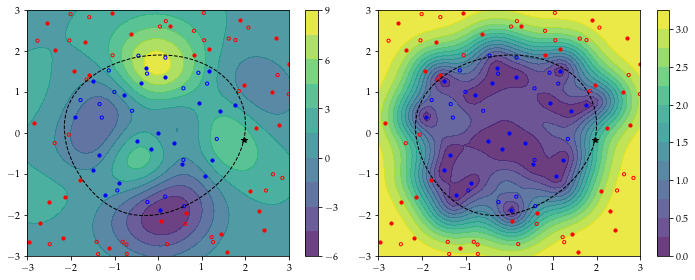

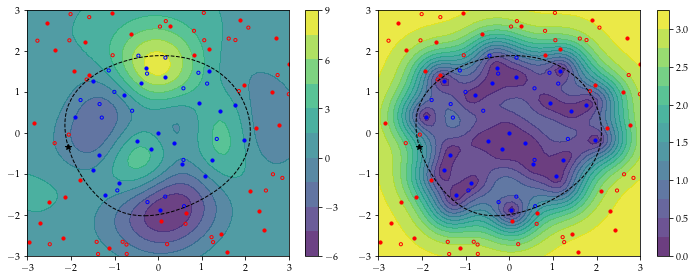

In [15]:
for i in range(5):
    # update DataHandler and rescale
    dh.x = np.r_[ dh.x, new_x ]
    dh.y = np.r_[ dh.y, new_y ]
    dh.t = np.r_[ dh.t, new_t ]
    dh.scale()

    regressor = GPR()   # build GP for regression
    classifier = GPC()  # build GP for classification

    # fit regression GP to feasible scaled training data
    regressor.fit(dh.x_[dh.t.ravel()==1, :], dh.y_[dh.t.ravel()==1])

    # fit classification NN to scaled training data
    classifier.fit(dh.x_, dh.t)

    # calculate validation metrics
    validation_metrics(classifier, regressor, dh, tester)

    # get new inputs
    ads = AdaptiveSampler(dh.space_, regressor, classifier)
    new_x = ads.max_gp_std(solver=solver, tee=False)
    new_x = dh.inv_scale_x(new_x)

    # sample new outputs and class targets
    new_y = peaks(new_x)
    new_t = feas(new_x)

    # plot
    plot_adaptive_gp(dh, tester, regressor, classifier, new_x)